In [1]:
!pip install tensorflow-datasets

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 14.6 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 140.1/140.1 kB 4.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.3/52.3 kB 1.7 MB/s eta 0:00:00
  Created wheel for promise: filename=promise-2.3-py3-none-any.whl size=21486 sha256=e0021586a02eaa2f99ada4d6368ae5633fc065042b7cd75c34d17fba4629f768
  Stored in directory: /Users/werther/Library/Caches/pip/wheels/68/ee/8d/57af0d8b0d34c2e918ff29d3af02b348db6499bb107caa007e
Successfully built promise


In [2]:
import tensorflow_datasets as tfds

datasets, info = tfds.load(name='cifar100', as_supervised=True, with_info=True)
dataset_size = info.splits['train'].num_examples
class_names = info.features['label'].names
n_classes = info.features['label'].num_classes


2022-12-09 09:37:27.640663: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-09 09:37:32.650631: W tensorflow/core/platform/cloud/google_auth_provider.cc:184] All attempts to get a Google authentication bearer token failed, returning an empty token. Retrieving token from files failed with "NOT_FOUND: Could not locate the credentials file.". Retrieving token from GCE failed with "FAILED_PRECONDITION: Error executing an HTTP request: libcurl code 6 meaning 'Couldn't resolve host name', error details: Could not resolve host: metadata".


Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/50000 [00:00<?, ? examples/s]

2022-12-09 09:38:32.029556: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Shuffling /Users/werther/tensorflow_datasets/cifar100/3.0.2.incompleteLQH0NN/cifar100-train.tfrecord*...:   0%…

Generating test examples...:   0%|          | 0/10000 [00:00<?, ? examples/s]

Shuffling /Users/werther/tensorflow_datasets/cifar100/3.0.2.incompleteLQH0NN/cifar100-test.tfrecord*...:   0%|…

Dataset cifar100 downloaded and prepared to /Users/werther/tensorflow_datasets/cifar100/3.0.2. Subsequent calls will reuse this data.


In [15]:
train_set = tfds.load('cifar100', split='train[:75%]', as_supervised=True)
valid_set = tfds.load('cifar100', split='train[75%:90%]', as_supervised=True)
test_set = tfds.load('cifar100', split='train[90%:]', as_supervised=True)


In [42]:
type(train_set)

tensorflow.python.data.ops.dataset_ops.PrefetchDataset

In [18]:
def preprocess(image, label) :
    resized_image = tf.image.resize(image, [224,224])
    final_image = tf.keras.applications.xception.preprocess_input(resized_image)
    return final_image, label

In [19]:
batch_size = 32
train_set = train_set.shuffle(1000)
train_set = train_set.map(preprocess).batch(batch_size).prefetch(1)
valid_set = valid_set.map(preprocess).batch(batch_size).prefetch(1)
test_set = test_set.map(preprocess).batch(batch_size).prefetch(1)

In [23]:
base_model = tf.keras.applications.xception.Xception(weights='imagenet', include_top=False)
avg = GlobalAveragePooling2D()(base_model.output)
output = Dense(n_classes, activation='softmax')(avg)
model = Model(inputs = base_model.input, outputs = output)

In [24]:
for layer in base_model.layers :
    layer.trainabler = False

In [33]:
from tensorflow.keras.optimizers import SGD

optimizer = SGD(learning_rate=0.2, momentum=0.9)
model.compile(loss='sparse_categorical_crossentropy', optimizer=optimizer, metrics=['acc'])
hist = model.fit(train_set, epochs=5, validation_data=valid_set)

Epoch 1/5
  11/1172 [..............................] - ETA: 2:12:45 - loss: 4.6304 - acc: 0.0199

KeyboardInterrupt: 

In [ ]:
# 케라스 모델 수정, 하단에서 부터 각 레이어를 제거.
base_model.layers.pop()

In [6]:
import keras as keras
from keras.layers import Conv2D, MaxPool2D,  \
    Dropout, Dense, Input, concatenate,      \
    GlobalAveragePooling2D, AveragePooling2D,\
    Flatten, BatchNormalization
from keras.initializers import glorot_uniform
from keras.initializers import Constant
from keras.utils import to_categorical
from keras.utils import np_utils
from keras.optimizers import SGD 
from keras.callbacks import LearningRateScheduler

import tensorflow as tf
from tensorflow.keras.layers import MaxPool2D
from tensorflow.keras.datasets import cifar10, mnist, fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Rescaling, Resizing, RandomCrop, RandomFlip, RandomRotation
from tensorflow.keras.models import Model
from tensorflow.keras.utils import plot_model
from tensorflow.keras.callbacks import Callback
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.models import load_model


In [7]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
import cv2
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import math
from IPython.display import Image
import math 
from numba import jit

In [10]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
# normalizing
x_train = x_train/255
x_test = x_test/255

# one-hot encoding
y_train_en = to_categorical(y_train)
y_test_en = to_categorical(y_test)

In [3]:
ti = x_train[0]
print(ti.shape)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

def augmentattion(x_train, y_train, resizing) :
    
    model = Sequential([Rescaling(1/255.),
                        resizing,
                       RandomCrop(32,32), # 32 X 32로 조정되어 중심축이 변경되며 일부가 잘려진다.
                       RandomFlip('horizontal'),
                       RandomRotation(np.random.randint(0,360))])

    Model.build(model, (1, ti.shape[0], ti.shape[1], 3)) # 3차원
    
    globals()[f"x_train_2"] = model(x_train)
                
    # 데이터 결합
    globals()[f"x_train_all"] = np.concatenate((x_train, x_train_2), axis=0) 
    globals()[f"y_train_all"] = np.concatenate((y_train, y_train), axis=0)
    
    
    
resizing = Resizing(int(ti.shape[0]*1.1), int(ti.shape[1]*1.1)) 
augmentattion(x_train, y_train, resizing)

(32, 32, 3)
(50000, 32, 32, 3)
(50000, 1)
(10000, 32, 32, 3)
(10000, 1)


2022-12-08 11:09:08.855323: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


2022-12-08 11:09:13.583326: W tensorflow/core/grappler/optimizers/loop_optimizer.cc:907] Skipping loop optimization for Merge node with control input: loop_body/cond/pfor/cond/branch_executed/_191


## load data

In [ ]:
def saveDir(x, option) : 
    globals()['li'] = []
    
    for idx, y in enumerate(x) :
        if option == "train" :
            src = cv2.imread(f'./cifar-10/train/train/{y}')
        elif option == "test" :
            src = cv2.imread(f'./cifar-10/test/test/{y}')
        else : 
            print("check option")
            break
        
#         blur = cv2.GaussianBlur(src, ksize=(3,3), sigmaX=0.0)
#         gap = src-blur
#         src = src + gap
        
        globals()[f'{option}{idx}'] = src

        li.append(globals()[f'{option}{idx}'])
    
    if option == "train" :
        globals()[f'{option}'] = np.array([li])
#         globals()[f'np{name}'] = globals()[f'np{name}'].reshape(len(globals()[f'np{name}'][0]),
#                                                                len(globals()[f'np{name}'][0][0]),
#                                                                len(globals()[f'np{name}'][0][0][0]))
    elif option == "test" :
        globals()[f'{option}'] = np.array([li])
#         globals()[f'npT{name}'] = globals()[f'npT{name}'].reshape(len(globals()[f'npT{name}'][0]),
#                                                                len(globals()[f'npT{name}'][0][0]),
#                                                                len(globals()[f'npT{name}'][0][0][0]))

## x_train

In [103]:
tr = os.listdir('./cifar-10/train/train/')
tr.sort(key=lambda x: int(x[:x.index('.')]))

In [104]:
saveDir(tr, "train")

In [105]:
x_train = train.reshape(50000, 32, 32, 3)

In [106]:
x_train = x_train/255.

## test

In [250]:
ts = os.listdir('./cifar-10/test/test/')

In [251]:
saveDir(ts, "test")

In [252]:
test = test.reshape(300000, 32, 32, 3)
test = test/255.

In [235]:
y_test2 = to_categorical(y_test2)

In [236]:
y_test2.shape

(10000, 10)

## y_train

In [102]:
# y_train
trainLabels = pd.read_csv('./cifar-10/trainLabels.csv')

le = LabelEncoder()
result = le.fit_transform(trainLabels['label'])
y_train = to_categorical(result)

In [151]:
y_train[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

In [111]:
result

array([6, 9, 9, ..., 9, 1, 1])

In [67]:
trainLabels

,id,label
0,1,frog
1,2,truck
2,3,truck
3,4,deer
4,5,automobile
...,...,...
49995,49996,bird
49996,49997,frog
49997,49998,truck
49998,49999,automobile


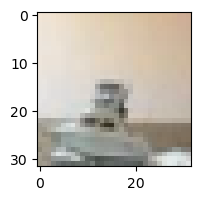

In [122]:
plt.figure(figsize=(2,2))
plt.imshow(x_train[0])

In [164]:
cls = trainLabels.label.unique()


## augmentation

In [206]:
def augmentattion(x_train, y_train, resizing) :
    
    model = Sequential([Rescaling(1/255.),
                        resizing,
                       RandomCrop(32,32), # 32 X 32로 조정되어 중심축이 변경되며 일부가 잘려진다.
                       RandomFlip('horizontal'),
                       RandomRotation(np.random.randint(0,360))])

    Model.build(model, (1, ti.shape[0], ti.shape[1], 3)) # 3차원
    
    globals()[f"x_train_2"] = model(x_train)
                
    # 데이터 결합
    globals()[f"x_train_all"] = np.concatenate((x_train, x_train_2), axis=0) 
    globals()[f"y_train_all"] = np.concatenate((y_train, y_train), axis=0)
    
    
    
resizing = Resizing(int(ti.shape[0]*1.1), int(ti.shape[1]*1.1)) 
augmentattion(x_train, y_train, resizing)

2022-12-08 15:18:30.459494: W tensorflow/core/grappler/optimizers/loop_optimizer.cc:907] Skipping loop optimization for Merge node with control input: loop_body/cond/branch_executed/_9


## network set

In [3]:
from tensorflow.keras.applications import ResNet50

In [4]:
cnn_base = ResNet50(include_top=False, 
                    weights="imagenet", 
                    input_shape=[32,32,3],
                   classes=10)

In [8]:
from IPython.core import application

cnn_base = ResNet50(include_top=False, weights='imagenet', input_shape=[32,32,3], classes=10)

def build_transfer_T(trainable=True):
    model = Sequential()
    model.add(cnn_base)
    cnn_base.trainable=trainable
    model.add(Flatten())
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(32, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(10, activation='softmax'))
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['acc'])
    return model

transfer_model = build_transfer_T()


In [126]:
kernel_init = keras.initializers.glorot_uniform()
bias_init = keras.initializers.Constant(value=0.2)

In [128]:
def deepConv2D(x, fts, kns, std, name, num) :
#     st = 1
#     if std == 2 : st == 2
#     else : st == 1
        
    y = Conv2D(filters=fts, kernel_size=kns, strides=std, padding='same', activation='relu', 
              kernel_initializer=kernel_init, bias_initializer=bias_init)(x)
    y = BatchNormalization()(y)
    
    for i in range(num-1) :
        y = Conv2D(filters=fts, kernel_size=kns, strides=1, padding='same', activation='relu', 
                  kernel_initializer=kernel_init, bias_initializer=bias_init)(y)
        y = BatchNormalization()(y)
    
    if std == 2 :
        x = Conv2D(filters=fts, kernel_size=1, strides=2, padding='same', activation='relu', 
                  kernel_initializer=kernel_init, bias_initializer=bias_init)(x)
        x = BatchNormalization()(x)

      
    output = x + y
    return output    

/Users/werther/opt/anaconda3/lib/python3.9/site-packages/keras/initializers/initializers_v2.py:120: UserWarning: The initializer GlorotUniform is unseeded and being called multiple times, which will return identical values  each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


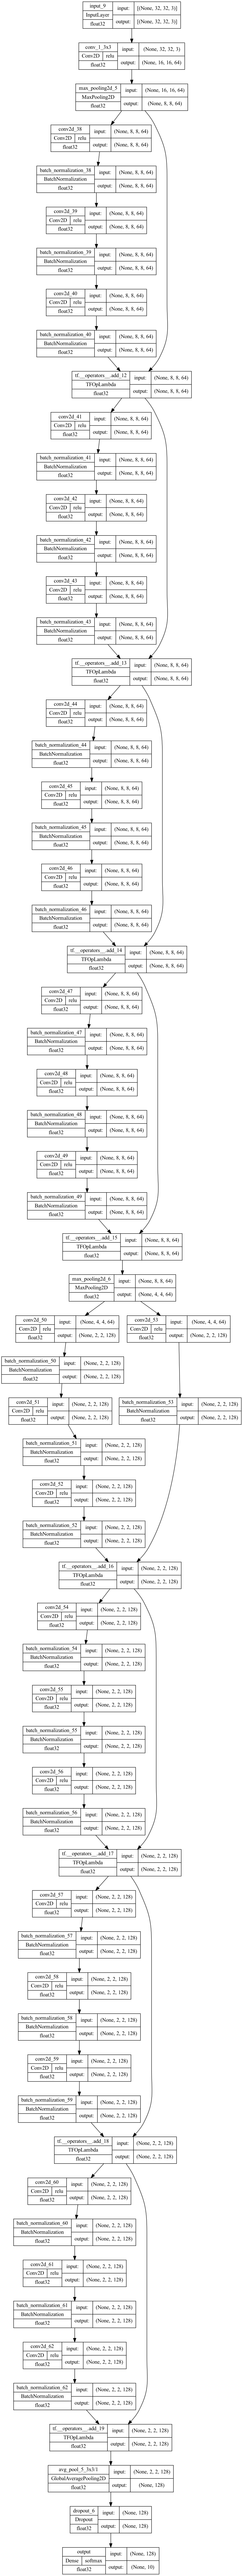

In [224]:
input_layer = Input(x_train.shape[1:])

x = Conv2D(64, (3, 3), strides=(2,2), padding='same', activation='relu', name='conv_1_3x3', kernel_initializer=kernel_init, bias_initializer=bias_init)(input_layer)
x = MaxPool2D((2, 2))(x)
x = deepConv2D(x, 64, (3,3), 1, "Conv2D/64/3x3/1", 3)
x = deepConv2D(x, 64, (3,3), 1, "Conv2D/64/3x3/2", 3)
x = deepConv2D(x, 64, (3,3), 1, "Conv2D/64/3x3/3", 3)
x = deepConv2D(x, 64, (3,3), 1, "Conv2D/64/3x3/4", 3)
# x = MaxPool2D((2, 2))(x)
# x = DepthwiseConv2D((2,2), strides=1, padding="same")(x)

x = deepConv2D(x, 128, (3,3), 2, "Conv2D/128/3x3/1", 3)
x = deepConv2D(x, 128, (3,3), 1, "Conv2D/128/3x3/2", 3)
x = deepConv2D(x, 128, (3,3), 1, "Conv2D/128/3x3/3", 3)
x = deepConv2D(x, 128, (3,3), 1, "Conv2D/128/3x3/4", 3)

x = GlobalAveragePooling2D(name='avg_pool_5_3x3/1')(x)
# x = Flatten()(x)
x = Dropout(0.4)(x)

x = Dense(10, activation='softmax', name='output')(x)

model4 = Model(input_layer, x, name='JSR')

plot_model(model4, show_shapes=True, show_dtype=True, show_layer_activations=True)

In [12]:
class MyCallback(Callback):
    def on_epoch_end(self, end, logs={}):
        if logs.get('val_acc') > 0.95:
            self.model.stop_training = True
            print('\n')
            print('목표 정확도 달성: 검증 정확도 %.4f' % logs.get('val_acc'))
my_callback = MyCallback()



def mdFit(model, num, X_train, y_train, my_callback) : # + best model select.

    model.compile(optimizer='adam',
              loss='categorical_crossentropy', #No OneHot Encoding : sparse_categorical_crossentropy
              metrics=['acc'])
    model.summary()
       
    best_model_path = f"./bestModel/LeNet5/best_cnn_model{num}.h5" 
    save_best_model = ModelCheckpoint(best_model_path,
                                      monitor='val_loss',
                                      save_best_only=True,
                                      save_weights_only=False)

    globals()[f'hist{num}'] = model.fit(
        x=X_train, y=y_train, batch_size=128, epochs=20, verbose=1,
        validation_split=0.2, callbacks=[my_callback ,save_best_model]) 
    # validation : (x_test, y_test)값을 가지고 와서 봐도 된다. 현재 0.2의 비율로 가져와서
    
    globals()[f'best_model{num}'] = load_model(best_model_path)
    globals()[f'best_model{num}'].summary()
    
    
def mdEval(model, x_tst, y_tst) :
    model.evaluate(x_tst, y_tst, batch_size=30, verbose=1)
    
def mdPred(model, X_tst) :
    result = model.predict(X_tst)
    return result

In [14]:
mdFit(transfer_model, 10, x_train, y_train_en, my_callback)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 1, 1, 2048)        23587712  
                                                                 
 flatten (Flatten)           (None, 2048)              0         
                                                                 
 dense (Dense)               (None, 64)                131136    
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 10)                3

KeyboardInterrupt: 

In [226]:

mdFit(model4, 4, x_train, y_train, my_callback)

Model: "JSR"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_9 (InputLayer)           [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 conv_1_3x3 (Conv2D)            (None, 16, 16, 64)   1792        ['input_9[0][0]']                
                                                                                                  
 max_pooling2d_5 (MaxPooling2D)  (None, 8, 8, 64)    0           ['conv_1_3x3[0][0]']             
                                                                                                  
 conv2d_38 (Conv2D)             (None, 8, 8, 64)     36928       ['max_pooling2d_5[0][0]']        
                                                                                                

 conv2d_50 (Conv2D)             (None, 2, 2, 128)    73856       ['max_pooling2d_6[0][0]']        
                                                                                                  
 batch_normalization_50 (BatchN  (None, 2, 2, 128)   512         ['conv2d_50[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 conv2d_51 (Conv2D)             (None, 2, 2, 128)    147584      ['batch_normalization_50[0][0]'] 
                                                                                                  
 batch_normalization_51 (BatchN  (None, 2, 2, 128)   512         ['conv2d_51[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 conv2d_53

                                                                                                  
Total params: 2,161,546
Trainable params: 2,156,682
Non-trainable params: 4,864
__________________________________________________________________________________________________
Epoch 1/20
313/313 [==============================] - 84s 247ms/step - loss: 1.6832 - acc: 0.4110 - val_loss: 2.0357 - val_acc: 0.3142
Epoch 2/20
313/313 [==============================] - 92s 294ms/step - loss: 1.2909 - acc: 0.5386 - val_loss: 1.9766 - val_acc: 0.4022
Epoch 3/20
313/313 [==============================] - 83s 264ms/step - loss: 1.1178 - acc: 0.6043 - val_loss: 1.6276 - val_acc: 0.4610
Epoch 4/20
313/313 [==============================] - 77s 245ms/step - loss: 0.9855 - acc: 0.6537 - val_loss: 1.2240 - val_acc: 0.5629
Epoch 5/20
313/313 [==============================] - 75s 240ms/step - loss: 0.8823 - acc: 0.6934 - val_loss: 1.2526 - val_acc: 0.5548
Epoch 6/20
313/313 [===========================

/Users/werther/opt/anaconda3/lib/python3.9/site-packages/keras/initializers/initializers_v2.py:120: UserWarning: The initializer GlorotUniform is unseeded and being called multiple times, which will return identical values  each time (even if the initializer is unseeded). Please update your code to provide a seed to the initializer, or avoid using the same initalizer instance more than once.
  warnings.warn(


Model: "JSR"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_9 (InputLayer)           [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 conv_1_3x3 (Conv2D)            (None, 16, 16, 64)   1792        ['input_9[0][0]']                
                                                                                                  
 max_pooling2d_5 (MaxPooling2D)  (None, 8, 8, 64)    0           ['conv_1_3x3[0][0]']             
                                                                                                  
 conv2d_38 (Conv2D)             (None, 8, 8, 64)     36928       ['max_pooling2d_5[0][0]']        
                                                                                                

 conv2d_50 (Conv2D)             (None, 2, 2, 128)    73856       ['max_pooling2d_6[0][0]']        
                                                                                                  
 batch_normalization_50 (BatchN  (None, 2, 2, 128)   512         ['conv2d_50[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 conv2d_51 (Conv2D)             (None, 2, 2, 128)    147584      ['batch_normalization_50[0][0]'] 
                                                                                                  
 batch_normalization_51 (BatchN  (None, 2, 2, 128)   512         ['conv2d_51[0][0]']              
 ormalization)                                                                                    
                                                                                                  
 conv2d_53

                                                                                                  
Total params: 2,161,546
Trainable params: 2,156,682
Non-trainable params: 4,864
__________________________________________________________________________________________________


In [245]:
best_model3.evaluate(x_test2, y_test2, batch_size=30, verbose=1)

334/334 [==============================] - 4s 11ms/step - loss: 286.7077 - acc: 0.2132


[286.7077331542969, 0.21320000290870667]

In [253]:
pred4 = best_model4.predict(test)

9375/9375 [==============================] - 190s 20ms/step


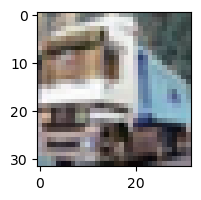

In [246]:
plt.figure(figsize=(2,2))
plt.imshow(x_train[1])

In [205]:
pred[:4]
# df.loc[df['label'] == 0, "label"] = "airplane"
# df.loc[df['label'] == 1, "label"] = "automobile"
# df.loc[df['label'] == 2, "label"] = "bird"
# df.loc[df['label'] == 3, "label"] = "cat"
# df.loc[df['label'] == 4, "label"] = "deer"
# df.loc[df['label'] == 5, "label"] = "dog"
# df.loc[df['label'] == 6, "label"] = "frog"
# df.loc[df['label'] == 7, "label"] = "horse"
# df.loc[df['label'] == 8, "label"] = "ship"
# df.loc[df['label'] == 9, "label"] = "truck"

array([[1.1890674e-02, 2.0720412e-05, 5.7812691e-02, 1.6691670e-02,
        8.9710075e-01, 6.1085424e-03, 8.0128317e-04, 8.4003787e-03,
        1.0817762e-03, 9.1582529e-05],
       [1.4149322e-04, 2.4867447e-03, 7.6233737e-02, 5.3703088e-01,
        2.8385004e-02, 1.5608236e-02, 2.9603583e-01, 4.0101353e-02,
        1.1893581e-04, 3.8577712e-03],
       [1.3989964e-09, 9.9999380e-01, 2.4438496e-09, 4.3292123e-10,
        2.2610439e-10, 2.3861271e-09, 2.8764967e-08, 2.1760758e-10,
        5.8399551e-06, 3.5762565e-07],
       [6.9831783e-01, 7.3754457e-03, 1.5091056e-02, 1.9177431e-03,
        1.1395729e-03, 8.5513508e-05, 1.0937465e-03, 1.0747673e-03,
        2.6969564e-01, 4.2087613e-03]], dtype=float32)

In [247]:
def checkRst(res) :
#     print(res)     
    li = []
    
    for i in res :
        li.append(np.argmax(i))
    
    return np.array(li)

In [254]:
aaa = checkRst(pred)

In [255]:
# list1 = [i for i in range(300000)]
# print(list1)
data = {"id" : [i for i in range(1, 300001)], "label" : aaa}
df = pd.DataFrame(data)

df.loc[df['label'] == 0, "label"] = "airplane"
df.loc[df['label'] == 1, "label"] = "automobile"
df.loc[df['label'] == 2, "label"] = "bird"
df.loc[df['label'] == 3, "label"] = "cat"
df.loc[df['label'] == 4, "label"] = "deer"
df.loc[df['label'] == 5, "label"] = "dog"
df.loc[df['label'] == 6, "label"] = "frog"
df.loc[df['label'] == 7, "label"] = "horse"
df.loc[df['label'] == 8, "label"] = "ship"
df.loc[df['label'] == 9, "label"] = "truck"

df.to_csv("answer.csv", index=False)

df[:30]

,id,label
0,1,deer
1,2,cat
2,3,automobile
3,4,airplane
4,5,ship
5,6,airplane
6,7,dog
7,8,bird
8,9,airplane
9,10,cat
